In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

%matplotlib inline

In [5]:
df = pd.read_csv("data2.csv")

\begin{align}
log(Price) = &\beta_0\ +\\ 
             &\beta_1Number of bathrooms\ +\\
             &\beta_2Old/New\ +\\
             &\beta_3PropertyType\ +\\
             &\beta_4Nearest\ distance\ to\ hospital
\end{align}

In [26]:
df.iloc[11059, :]

Unnamed: 0                    11059
soldPrice                    320000
bednumber                         4
propertyType               Terraced
duration_free_not_lease           1
isNew                             0
latitude                    51.3886
longitude                  -2.39496
Name: 11059, dtype: object

In [22]:
df2 = pd.read_csv("data.csv")

In [25]:
22870 - 11811

11059

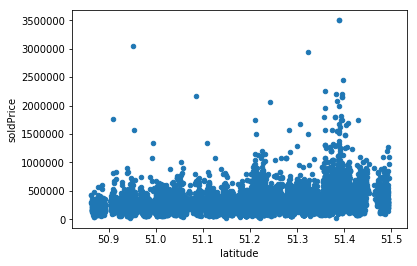

In [6]:
df.plot.scatter(x="latitude", y="soldPrice")

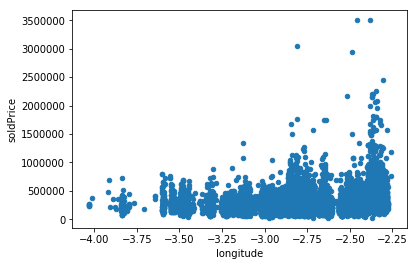

In [7]:
df.plot.scatter(x="longitude", y="soldPrice")

In [18]:
lat_lon_price = df.groupby(["longitude", "latitude"])["soldPrice"].mean()

lat_lon_price = lat_lon_price.sort_values()
lat_lon_price = lat_lon_price[:-10]

lats = [x[0] for x in lat_lon_price.index]
lons = [y[1] for y in lat_lon_price.index]
prices = lat_lon_price.values
max_v = lat_lon_price.values.max()
min_v = lat_lon_price.values.min()

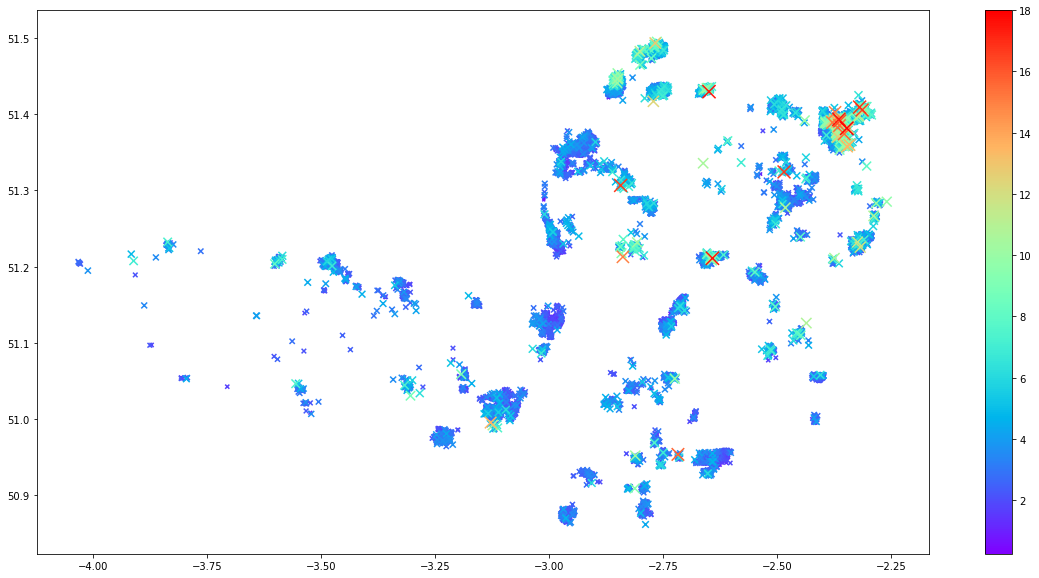

In [19]:
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=min_v/100000, vmax=max_v/100000)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=lats, y=lons, color=cmap(norm(prices/100000)), s=(prices/100000)*10, marker="x")

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
coords = df.as_matrix(columns=['latitude', 'longitude'])

kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Number of clusters: 86


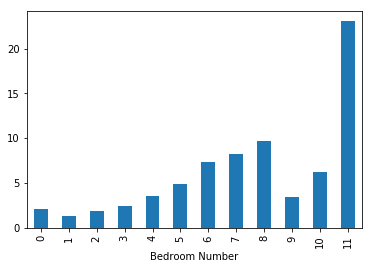

In [227]:
ax_bar = (df.groupby("bednumber")["soldPrice"].mean() / 100000).plot.bar()
ax_bar.set_xlabel("Bedroom Number")
ax_bar

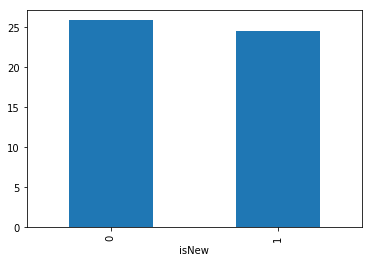

In [228]:
(df.groupby("isNew")["soldPrice"].mean() / 10000).plot.bar()

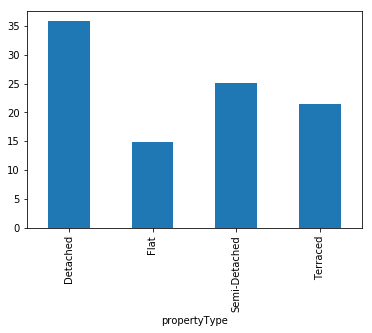

In [229]:
(df.groupby("propertyType")["soldPrice"].mean() / 10000).plot.bar()

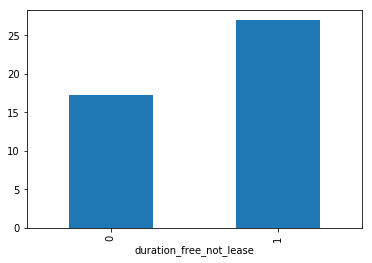

In [230]:
(df.groupby("duration_free_not_lease")["soldPrice"].mean() / 10000).plot.bar()